In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import scipy.stats as ss
import math
from glob import glob
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import catboost
from pandas import Series, DataFrame

%matplotlib inline
%matplotlib inline

In [28]:
train_df = pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
test_df = pd.read_csv('tcd ml 2019-20 income prediction test (without labels).csv')
test_df.info()
test_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73230 entries, 0 to 73229
Data columns (total 12 columns):
Instance             73230 non-null int64
Year of Record       72935 non-null float64
Gender               68368 non-null object
Age                  72951 non-null float64
Country              73230 non-null object
Size of City         73230 non-null int64
Profession           73035 non-null object
University Degree    68373 non-null object
Wears Glasses        73230 non-null int64
Hair Color           68314 non-null object
Body Height [cm]     73230 non-null int64
Income in EUR        0 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.7+ MB


,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,111994,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN
1,111995,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN
2,111996,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN
3,111997,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154,NaN
4,111998,2007.0,other,17.0,Serbia,120661,portfolio manager,No,0,Red,191,NaN
5,111999,2013.0,female,56.0,United Arab Emirates,2223918,sales representative,Master,0,Black,175,NaN
6,112000,2002.0,male,49.0,Slovakia,1753551,senior resiliency planner,No,1,Black,173,NaN
7,112001,2012.0,female,66.0,Kyrgyzstan,467678,interviewer,Bachelor,1,Black,149,NaN
8,112002,2008.0,male,35.0,Togo,817914,quality assurance auditor,NaN,1,Black,205,NaN
9,112003,2003.0,male,49.0,Liberia,290455,office coordinator,No,0,Blond,136,NaN


In [29]:
train_df=train_df[train_df['Income in EUR']>0]
print (train_df.info())
train_df = pd.concat([train_df,test_df],axis=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185057 entries, 0 to 73229
Data columns (total 12 columns):
Instance             185057 non-null int64
Year of Record       184322 non-null float64
Gender               172810 non-null object
Age                  184285 non-null float64
Country              185057 non-null object
Size of City         185057 non-null int64
Profession           184541 non-null object
University Degree    172852 non-null object
Wears Glasses        185057 non-null int64
Hair Color           172912 non-null object
Body Height [cm]     185057 non-null int64
Income in EUR        111827 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 18.4+ MB


In [4]:
#train_df.loc[train_df['Income in EUR']<0,'Income in EUR']=0

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111827 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111827 non-null int64
Year of Record       111387 non-null float64
Gender               104442 non-null object
Age                  111334 non-null float64
Country              111827 non-null object
Size of City         111827 non-null int64
Profession           111506 non-null object
University Degree    104479 non-null object
Wears Glasses        111827 non-null int64
Hair Color           104598 non-null object
Body Height [cm]     111827 non-null int64
Income in EUR        111827 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 11.1+ MB


In [30]:
train_df.loc[train_df['Income in EUR']>2500000,'Income in EUR']=2500000
train_df[train_df['Income in EUR']>2000000]

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
399,400,2017.0,male,51.0,Morocco,1026363,senior inspector,PhD,0,Blond,158,2005402.704
426,427,2006.0,unknown,62.0,Argentina,2065962,oil burner specialist,Master,1,NaN,200,2165958.301
11658,11659,2015.0,other,91.0,Cameroon,411442,securities commodities and financial services ...,Master,1,Brown,165,2060646.581
21680,21681,2018.0,male,72.0,Poland,1425888,program assistant,Master,1,Blond,172,2457451.634
54703,54704,2013.0,other,102.0,Bahrain,1572871,senior port engineer,No,0,Black,183,2076230.757
60079,60080,2007.0,male,80.0,Angola,130609,triage coordinator,Master,1,Brown,219,2500000.000
60587,60588,2008.0,other,42.0,Guyana,64129,Anaesthetist,Master,1,Brown,188,2389023.693
67752,67753,2011.0,male,70.0,Colombia,774415,operations manager,Master,0,Brown,185,2061035.127
77443,77444,2016.0,other,58.0,Comoros,670577,regional field administrative assistant,Bachelor,1,Brown,206,2086362.695
77645,77646,2018.0,female,75.0,Cyprus,277093,senior human capital partnership and performan...,PhD,0,Unknown,188,2500000.000


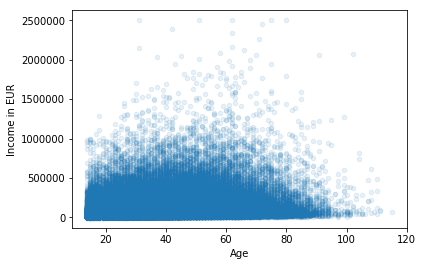

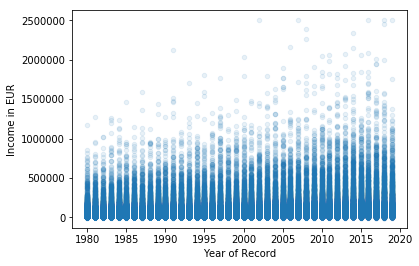

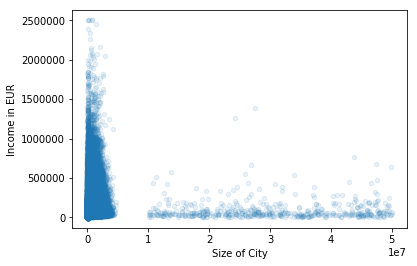

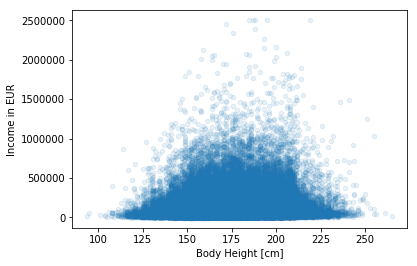

In [5]:
train_df.plot(kind="scatter",x="Age",y="Income in EUR",alpha=0.1)
train_df.plot(kind="scatter",x="Year of Record",y="Income in EUR",alpha=0.1)
train_df.plot(kind="scatter",x="Size of City"   ,y="Income in EUR",alpha=0.1)
train_df.plot(kind="scatter",x="Body Height [cm]"   ,y="Income in EUR",alpha=0.1)

In [6]:
train_df.isna().sum()
corr_matrix=train_df.corr()
corr_matrix["Income in EUR"].sort_values(ascending=False)

Income in EUR       1.000000
Age                 0.187007
Year of Record      0.165703
Body Height [cm]    0.073116
Size of City        0.015113
Wears Glasses       0.005843
Instance            0.002719
Name: Income in EUR, dtype: float64

In [31]:
def pronull(colname,df,replacestr):
    #print (df[colname].value_counts())
    df[colname]= df[colname].replace(replacestr, np.nan)
    print (df[colname].value_counts())
pronull('University Degree',train_df,'0')
pronull('Gender',train_df,'0')
pronull('Gender',test_df,'0')
pronull('Gender',train_df,'unknown')
pronull('Gender',test_df,'unknown')
pronull('Gender',train_df,'other')
pronull('Gender',test_df,'other')


Bachelor    71028
Master      44807
No          44642
PhD         11219
Name: University Degree, dtype: int64
male       70948
female     44821
other      44667
unknown    11195
Name: Gender, dtype: int64
male       28210
female     17743
other      17614
unknown     4346
Name: Gender, dtype: int64
male      70948
female    44821
other     44667
Name: Gender, dtype: int64
male      28210
female    17743
other     17614
Name: Gender, dtype: int64
male      70948
female    44821
Name: Gender, dtype: int64
male      28210
female    17743
Name: Gender, dtype: int64


In [32]:
def agedegdef(df):
    df.loc[ (df.Gender.isnull())&(df['Body Height [cm]']<=166),'Gender'] =['female']
    df.loc[ (df.Gender.isnull())&(df['Body Height [cm]']>166),'Gender'] =['male']

    df.loc[ (df['University Degree'].isnull())&(df['Age']<22),'University Degree'] =['No']

    df.loc[ (df.Gender=="male"),'Gender'] =1
    df.loc[ (df.Gender=="female"),'Gender'] =0

    df.loc[ (df.Age.isnull()),'Age'] =df['Age'].median()
    df.loc[ (df['Year of Record'].isnull()),'Year of Record'] =df['Year of Record'].median()
    
    
agedegdef(train_df)
print(train_df.isna().sum())

Instance                 0
Year of Record           0
Gender                   0
Age                      0
Country                  0
Size of City             0
Profession             516
University Degree    10928
Wears Glasses            0
Hair Color           12145
Body Height [cm]         0
Income in EUR        73230
dtype: int64


In [33]:
def onehot(df):
    
    df= pd.concat([df,pd.get_dummies(df['Profession'])],axis=1)
    df = pd.concat([df,pd.get_dummies(df['Country'])],axis=1)
    df = pd.concat([df,pd.get_dummies(df['University Degree'])],axis=1)
    
    #df= pd.concat([df,pd.get_dummies(df['Year of Recordmap'])],axis=1)
    #df = pd.concat([df,pd.get_dummies(df['Agemap'])],axis=1)
    #df = pd.concat([df,pd.get_dummies(df['Size of Citymap'])],axis=1)
    #df=df.drop(['Wears Glasses','Hair Color','Instance','Year of Record','Size of City','Agemap','Age','Size of Citymap','Year of Recordmap','Body Height [cm]','Body Height [cm]map'],axis=1)
    df=df.drop(['Wears Glasses','Hair Color','Instance','Body Height [cm]'],axis=1)
    df=df.drop(['University Degree', 'Profession','Country'],axis=1)
    return df
train_ndf=onehot(train_df)
print(train_ndf.isna().sum())

Year of Record                  0
Gender                          0
Age                             0
Size of City                    0
Income in EUR               73230
.net developer                  0
.net software developer         0
Accountant                      0
Accounts Assistant              0
Accounts Clerk                  0
Accounts Manager                0
Accounts Staff                  0
Acoustic Engineer               0
Actor                           0
Actress                         0
Actuary                         0
Acupuncturist                   0
Adjustor                        0
Administration Assistant        0
Administration Clerk            0
Administration Manager          0
Administration Staff            0
Administrator                   0
Advertising Agent               0
Advertising Assistant           0
Advertising Clerk               0
Advertising Contractor          0
Advertising Executive           0
Advertising Manager             0
Advertising St

In [34]:
def normy(y):
    arr_mean = np.mean(y)
    arr_std = np.std(y,ddof=1)
    y=(y-arr_mean)/arr_std
    return y
train_ndf['Age']=normy(train_ndf['Age'])
train_ndf['Year of Record']=normy(train_ndf['Year of Record'])
train_ndf['Size of City']=normy(train_ndf['Size of City'])
train_ndf['Income in EUR'][:111993]=normy(train_ndf['Income in EUR'][:111993])
#train_ndf['Income in EUR'][:111993]=np.sqrt(train_ndf['Income in EUR'][:111993])
train_ndf.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Year of Record,Gender,Age,Size of City,Income in EUR,.net developer,.net software developer,Accountant,Accounts Assistant,Accounts Clerk,...,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Bachelor,Master,No,PhD
0,-0.212569,1,0.231503,0.187899,-0.324235,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.299150,1,0.231503,0.356470,-0.123085,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.605648,1,-0.582807,0.214831,0.326481,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.566667,1,-0.269611,-0.038375,-0.425169,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.912994,0,0.544700,-0.342768,-0.478674,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train_ndf = pd.concat([train_ndf['Income in EUR'],train_ndf.iloc[:,:4],train_ndf.iloc[:,5:]],axis=1)
train_ndf.head()


,Income in EUR,Year of Record,Gender,Age,Size of City,.net developer,.net software developer,Accountant,Accounts Assistant,Accounts Clerk,...,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Bachelor,Master,No,PhD
0,-0.324235,-0.212569,1,0.231503,0.187899,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.123085,-0.299150,1,0.231503,0.356470,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.326481,1.605648,1,-0.582807,0.214831,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.425169,0.566667,1,-0.269611,-0.038375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.478674,0.912994,0,0.544700,-0.342768,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
train_ndf.isna().count()

Income in EUR               185057
Year of Record              185057
Gender                      185057
Age                         185057
Size of City                185057
.net developer              185057
.net software developer     185057
Accountant                  185057
Accounts Assistant          185057
Accounts Clerk              185057
Accounts Manager            185057
Accounts Staff              185057
Acoustic Engineer           185057
Actor                       185057
Actress                     185057
Actuary                     185057
Acupuncturist               185057
Adjustor                    185057
Administration Assistant    185057
Administration Clerk        185057
Administration Manager      185057
Administration Staff        185057
Administrator               185057
Advertising Agent           185057
Advertising Assistant       185057
Advertising Clerk           185057
Advertising Contractor      185057
Advertising Executive       185057
Advertising Manager 

In [47]:
from sklearn.decomposition import PCA
y = train_ndf.iloc[:, 0]
X = train_ndf.iloc[:, 1:]

pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X)

In [48]:
known_X = X_reduced[:111827]
unknown_X = X_reduced[111827:]
#known_X = X[:111993]
#unknown_X = X[111993:]
y_unknown=y[:111827]

In [49]:
unknown_X.__len__()

73230

In [ ]:
from sklearn.model_selection import cross_val_score
cmodel = catboost.CatBoostRegressor(iterations=400,  learning_rate = 0.05, depth=10)
score = cross_val_score(cmodel,known_X, y_unknown,scoring="neg_mean_squared_error",cv=10)

0:	learn: 0.9674637	total: 1.71s	remaining: 11m 21s
1:	learn: 0.9361179	total: 3.42s	remaining: 11m 20s
2:	learn: 0.9062095	total: 4.98s	remaining: 10m 59s
3:	learn: 0.8783786	total: 6.75s	remaining: 11m 7s
4:	learn: 0.8511076	total: 8.61s	remaining: 11m 20s
5:	learn: 0.8263752	total: 10.3s	remaining: 11m 14s
6:	learn: 0.8025551	total: 12.1s	remaining: 11m 16s
7:	learn: 0.7795877	total: 13.6s	remaining: 11m 7s
8:	learn: 0.7585000	total: 15.4s	remaining: 11m 10s
9:	learn: 0.7395568	total: 17.1s	remaining: 11m 5s
10:	learn: 0.7211895	total: 18.7s	remaining: 11m 2s
11:	learn: 0.7031774	total: 20.4s	remaining: 10m 58s
12:	learn: 0.6866219	total: 22s	remaining: 10m 54s
13:	learn: 0.6709295	total: 23.7s	remaining: 10m 54s
14:	learn: 0.6561398	total: 25.4s	remaining: 10m 51s
15:	learn: 0.6425643	total: 27s	remaining: 10m 47s
16:	learn: 0.6302057	total: 28.8s	remaining: 10m 48s
17:	learn: 0.6192019	total: 30.4s	remaining: 10m 44s
18:	learn: 0.6078668	total: 32.2s	remaining: 10m 44s
19:	learn: 

155:	learn: 0.4020253	total: 4m 44s	remaining: 7m 24s
156:	learn: 0.4017555	total: 4m 45s	remaining: 7m 22s
157:	learn: 0.4012957	total: 4m 47s	remaining: 7m 20s
158:	learn: 0.4010811	total: 4m 49s	remaining: 7m 18s
159:	learn: 0.4008416	total: 4m 50s	remaining: 7m 16s
160:	learn: 0.4005777	total: 4m 52s	remaining: 7m 14s
161:	learn: 0.4002363	total: 4m 54s	remaining: 7m 12s
162:	learn: 0.4000868	total: 4m 55s	remaining: 7m 9s
163:	learn: 0.3997345	total: 4m 57s	remaining: 7m 7s
164:	learn: 0.3995092	total: 4m 58s	remaining: 7m 5s
165:	learn: 0.3992925	total: 5m	remaining: 7m 3s
166:	learn: 0.3990139	total: 5m 1s	remaining: 7m 1s
167:	learn: 0.3987140	total: 5m 3s	remaining: 6m 59s
168:	learn: 0.3986008	total: 5m 4s	remaining: 6m 56s
169:	learn: 0.3984267	total: 5m 6s	remaining: 6m 54s
170:	learn: 0.3981670	total: 5m 8s	remaining: 6m 52s
171:	learn: 0.3977343	total: 5m 9s	remaining: 6m 50s
172:	learn: 0.3976379	total: 5m 11s	remaining: 6m 48s
173:	learn: 0.3975236	total: 5m 12s	remaini

308:	learn: 0.3695510	total: 8m 44s	remaining: 2m 34s
309:	learn: 0.3694127	total: 8m 46s	remaining: 2m 32s
310:	learn: 0.3693097	total: 8m 47s	remaining: 2m 30s
311:	learn: 0.3690563	total: 8m 49s	remaining: 2m 29s
312:	learn: 0.3689051	total: 8m 51s	remaining: 2m 27s
313:	learn: 0.3687797	total: 8m 53s	remaining: 2m 26s
314:	learn: 0.3685959	total: 8m 54s	remaining: 2m 24s
315:	learn: 0.3685298	total: 8m 56s	remaining: 2m 22s
316:	learn: 0.3683955	total: 8m 57s	remaining: 2m 20s
317:	learn: 0.3682553	total: 8m 59s	remaining: 2m 19s
318:	learn: 0.3680926	total: 9m	remaining: 2m 17s
319:	learn: 0.3680092	total: 9m 2s	remaining: 2m 15s
320:	learn: 0.3678688	total: 9m 3s	remaining: 2m 13s
321:	learn: 0.3677198	total: 9m 5s	remaining: 2m 12s
322:	learn: 0.3674633	total: 9m 6s	remaining: 2m 10s
323:	learn: 0.3672726	total: 9m 7s	remaining: 2m 8s
324:	learn: 0.3672074	total: 9m 9s	remaining: 2m 6s
325:	learn: 0.3670310	total: 9m 10s	remaining: 2m 5s
326:	learn: 0.3668781	total: 9m 12s	remai

62:	learn: 0.4480372	total: 1m 48s	remaining: 9m 41s
63:	learn: 0.4469590	total: 1m 50s	remaining: 9m 39s
64:	learn: 0.4457575	total: 1m 52s	remaining: 9m 38s
65:	learn: 0.4445293	total: 1m 53s	remaining: 9m 36s
66:	learn: 0.4434600	total: 1m 55s	remaining: 9m 34s
67:	learn: 0.4424393	total: 1m 57s	remaining: 9m 32s
68:	learn: 0.4414210	total: 1m 58s	remaining: 9m 30s
69:	learn: 0.4403220	total: 2m	remaining: 9m 28s
70:	learn: 0.4393490	total: 2m 2s	remaining: 9m 25s
71:	learn: 0.4386529	total: 2m 3s	remaining: 9m 23s
72:	learn: 0.4377442	total: 2m 5s	remaining: 9m 21s
73:	learn: 0.4370480	total: 2m 7s	remaining: 9m 19s
74:	learn: 0.4364789	total: 2m 8s	remaining: 9m 16s
75:	learn: 0.4357218	total: 2m 10s	remaining: 9m 15s
76:	learn: 0.4351192	total: 2m 11s	remaining: 9m 12s
77:	learn: 0.4343860	total: 2m 13s	remaining: 9m 11s
78:	learn: 0.4335605	total: 2m 15s	remaining: 9m 9s
79:	learn: 0.4328766	total: 2m 16s	remaining: 9m 6s
80:	learn: 0.4324311	total: 2m 18s	remaining: 9m 5s
81:	l

215:	learn: 0.3895829	total: 8m 16s	remaining: 7m 3s
216:	learn: 0.3895121	total: 8m 19s	remaining: 7m
217:	learn: 0.3894256	total: 8m 20s	remaining: 6m 58s
218:	learn: 0.3891032	total: 8m 23s	remaining: 6m 55s
219:	learn: 0.3886646	total: 8m 25s	remaining: 6m 53s
220:	learn: 0.3885799	total: 8m 27s	remaining: 6m 51s
221:	learn: 0.3884261	total: 8m 30s	remaining: 6m 49s
222:	learn: 0.3881954	total: 8m 33s	remaining: 6m 47s
223:	learn: 0.3881269	total: 8m 36s	remaining: 6m 45s
224:	learn: 0.3879505	total: 8m 38s	remaining: 6m 43s
225:	learn: 0.3876966	total: 8m 40s	remaining: 6m 40s
226:	learn: 0.3875664	total: 8m 41s	remaining: 6m 37s
227:	learn: 0.3872169	total: 8m 44s	remaining: 6m 35s
228:	learn: 0.3868782	total: 8m 46s	remaining: 6m 33s
229:	learn: 0.3867680	total: 8m 48s	remaining: 6m 30s
230:	learn: 0.3866333	total: 8m 50s	remaining: 6m 28s
231:	learn: 0.3864369	total: 8m 52s	remaining: 6m 25s
232:	learn: 0.3862488	total: 8m 54s	remaining: 6m 23s
233:	learn: 0.3861329	total: 8m 5

367:	learn: 0.3631443	total: 12m 48s	remaining: 1m 6s
368:	learn: 0.3630702	total: 12m 49s	remaining: 1m 4s
369:	learn: 0.3628477	total: 12m 51s	remaining: 1m 2s
370:	learn: 0.3627759	total: 12m 52s	remaining: 1m
371:	learn: 0.3626711	total: 12m 54s	remaining: 58.3s
372:	learn: 0.3625676	total: 12m 56s	remaining: 56.2s
373:	learn: 0.3623910	total: 12m 58s	remaining: 54.1s
374:	learn: 0.3622753	total: 12m 59s	remaining: 52s
375:	learn: 0.3619837	total: 13m 1s	remaining: 49.9s
376:	learn: 0.3617886	total: 13m 3s	remaining: 47.8s
377:	learn: 0.3614403	total: 13m 5s	remaining: 45.7s
378:	learn: 0.3613191	total: 13m 6s	remaining: 43.6s
379:	learn: 0.3612432	total: 13m 8s	remaining: 41.5s
380:	learn: 0.3610992	total: 13m 10s	remaining: 39.4s
381:	learn: 0.3609144	total: 13m 12s	remaining: 37.3s
382:	learn: 0.3607773	total: 13m 15s	remaining: 35.3s
383:	learn: 0.3606487	total: 13m 18s	remaining: 33.3s
384:	learn: 0.3605383	total: 13m 20s	remaining: 31.2s
385:	learn: 0.3602292	total: 13m 22s	r

121:	learn: 0.4146739	total: 3m 52s	remaining: 8m 48s
122:	learn: 0.4142312	total: 3m 53s	remaining: 8m 46s
123:	learn: 0.4140084	total: 3m 55s	remaining: 8m 44s
124:	learn: 0.4138151	total: 3m 57s	remaining: 8m 41s
125:	learn: 0.4135342	total: 3m 58s	remaining: 8m 39s
126:	learn: 0.4128952	total: 4m	remaining: 8m 36s
127:	learn: 0.4126639	total: 4m 2s	remaining: 8m 34s
128:	learn: 0.4121180	total: 4m 3s	remaining: 8m 32s
129:	learn: 0.4118930	total: 4m 5s	remaining: 8m 30s
130:	learn: 0.4116757	total: 4m 7s	remaining: 8m 27s
131:	learn: 0.4111794	total: 4m 8s	remaining: 8m 25s
132:	learn: 0.4107374	total: 4m 10s	remaining: 8m 22s
133:	learn: 0.4104101	total: 4m 12s	remaining: 8m 20s
134:	learn: 0.4101629	total: 4m 13s	remaining: 8m 18s
135:	learn: 0.4098915	total: 4m 15s	remaining: 8m 15s
136:	learn: 0.4095161	total: 4m 17s	remaining: 8m 13s
137:	learn: 0.4093183	total: 4m 18s	remaining: 8m 11s
138:	learn: 0.4091742	total: 4m 20s	remaining: 8m 9s
139:	learn: 0.4088487	total: 4m 22s	re

274:	learn: 0.3794582	total: 8m 24s	remaining: 3m 49s
275:	learn: 0.3792790	total: 8m 26s	remaining: 3m 47s
276:	learn: 0.3791421	total: 8m 29s	remaining: 3m 46s
277:	learn: 0.3788948	total: 8m 32s	remaining: 3m 44s
278:	learn: 0.3788024	total: 8m 33s	remaining: 3m 42s
279:	learn: 0.3785963	total: 8m 35s	remaining: 3m 40s
280:	learn: 0.3783593	total: 8m 37s	remaining: 3m 39s
281:	learn: 0.3782914	total: 8m 39s	remaining: 3m 37s
282:	learn: 0.3779740	total: 8m 42s	remaining: 3m 35s
283:	learn: 0.3776882	total: 8m 44s	remaining: 3m 34s
284:	learn: 0.3775849	total: 8m 46s	remaining: 3m 32s
285:	learn: 0.3772482	total: 8m 48s	remaining: 3m 30s
286:	learn: 0.3770478	total: 8m 50s	remaining: 3m 28s
287:	learn: 0.3768390	total: 8m 52s	remaining: 3m 27s
288:	learn: 0.3765719	total: 8m 54s	remaining: 3m 25s
289:	learn: 0.3764165	total: 8m 56s	remaining: 3m 23s
290:	learn: 0.3762080	total: 8m 58s	remaining: 3m 21s
291:	learn: 0.3758130	total: 9m 1s	remaining: 3m 20s
292:	learn: 0.3757244	total: 

27:	learn: 0.5369041	total: 51.1s	remaining: 11m 19s
28:	learn: 0.5314440	total: 54.2s	remaining: 11m 33s
29:	learn: 0.5260081	total: 56.1s	remaining: 11m 31s
30:	learn: 0.5212612	total: 57.5s	remaining: 11m 24s
31:	learn: 0.5168390	total: 59.1s	remaining: 11m 19s
32:	learn: 0.5123309	total: 1m	remaining: 11m 15s
33:	learn: 0.5082931	total: 1m 2s	remaining: 11m 13s
34:	learn: 0.5043995	total: 1m 4s	remaining: 11m 13s
35:	learn: 0.5004339	total: 1m 6s	remaining: 11m 11s
36:	learn: 0.4970286	total: 1m 8s	remaining: 11m 7s
37:	learn: 0.4939961	total: 1m 10s	remaining: 11m 8s
38:	learn: 0.4910087	total: 1m 12s	remaining: 11m 7s
39:	learn: 0.4881980	total: 1m 14s	remaining: 11m 7s
40:	learn: 0.4855237	total: 1m 15s	remaining: 11m 5s
41:	learn: 0.4827823	total: 1m 17s	remaining: 11m 4s
42:	learn: 0.4803961	total: 1m 19s	remaining: 11m 4s
43:	learn: 0.4780579	total: 1m 22s	remaining: 11m 6s
44:	learn: 0.4756872	total: 1m 25s	remaining: 11m 11s
45:	learn: 0.4736832	total: 1m 27s	remaining: 11m

180:	learn: 0.3999443	total: 6m 5s	remaining: 7m 22s
181:	learn: 0.3996370	total: 6m 7s	remaining: 7m 20s
182:	learn: 0.3994730	total: 6m 9s	remaining: 7m 18s
183:	learn: 0.3991181	total: 6m 11s	remaining: 7m 16s
184:	learn: 0.3987211	total: 6m 13s	remaining: 7m 14s
185:	learn: 0.3985990	total: 6m 15s	remaining: 7m 11s
186:	learn: 0.3983386	total: 6m 17s	remaining: 7m 9s
187:	learn: 0.3980586	total: 6m 19s	remaining: 7m 7s
188:	learn: 0.3976633	total: 6m 21s	remaining: 7m 5s
189:	learn: 0.3975525	total: 6m 23s	remaining: 7m 3s
190:	learn: 0.3973168	total: 6m 25s	remaining: 7m 1s
191:	learn: 0.3970813	total: 6m 27s	remaining: 6m 59s
192:	learn: 0.3968927	total: 6m 29s	remaining: 6m 57s
193:	learn: 0.3966519	total: 6m 30s	remaining: 6m 55s
194:	learn: 0.3964486	total: 6m 32s	remaining: 6m 52s
195:	learn: 0.3962326	total: 6m 34s	remaining: 6m 50s
196:	learn: 0.3960117	total: 6m 36s	remaining: 6m 48s
197:	learn: 0.3957242	total: 6m 38s	remaining: 6m 46s
198:	learn: 0.3954835	total: 6m 40s	

333:	learn: 0.3675513	total: 10m 53s	remaining: 2m 9s
334:	learn: 0.3674359	total: 10m 54s	remaining: 2m 7s
335:	learn: 0.3672865	total: 10m 56s	remaining: 2m 5s
336:	learn: 0.3671266	total: 10m 58s	remaining: 2m 3s
337:	learn: 0.3670057	total: 10m 59s	remaining: 2m 1s
338:	learn: 0.3668478	total: 11m 1s	remaining: 1m 59s
339:	learn: 0.3666670	total: 11m 3s	remaining: 1m 57s
340:	learn: 0.3664558	total: 11m 5s	remaining: 1m 55s
341:	learn: 0.3663753	total: 11m 7s	remaining: 1m 53s
342:	learn: 0.3662746	total: 11m 9s	remaining: 1m 51s
343:	learn: 0.3660797	total: 11m 11s	remaining: 1m 49s
344:	learn: 0.3659985	total: 11m 13s	remaining: 1m 47s
345:	learn: 0.3659186	total: 11m 15s	remaining: 1m 45s
346:	learn: 0.3657347	total: 11m 17s	remaining: 1m 43s
347:	learn: 0.3655968	total: 11m 20s	remaining: 1m 41s
348:	learn: 0.3654975	total: 11m 23s	remaining: 1m 39s
349:	learn: 0.3653947	total: 11m 28s	remaining: 1m 38s
350:	learn: 0.3652047	total: 11m 32s	remaining: 1m 36s
351:	learn: 0.365002

88:	learn: 0.4276973	total: 2m 24s	remaining: 8m 24s
89:	learn: 0.4270665	total: 2m 25s	remaining: 8m 22s
90:	learn: 0.4268809	total: 2m 27s	remaining: 8m 19s
91:	learn: 0.4263451	total: 2m 28s	remaining: 8m 17s
92:	learn: 0.4259943	total: 2m 30s	remaining: 8m 15s
93:	learn: 0.4254986	total: 2m 31s	remaining: 8m 13s
94:	learn: 0.4250965	total: 2m 32s	remaining: 8m 10s
95:	learn: 0.4244781	total: 2m 34s	remaining: 8m 8s
96:	learn: 0.4240162	total: 2m 35s	remaining: 8m 6s
97:	learn: 0.4235093	total: 2m 37s	remaining: 8m 4s
98:	learn: 0.4230361	total: 2m 38s	remaining: 8m 2s
99:	learn: 0.4226312	total: 2m 40s	remaining: 8m
100:	learn: 0.4223001	total: 2m 41s	remaining: 7m 59s
101:	learn: 0.4217209	total: 2m 43s	remaining: 7m 56s
102:	learn: 0.4210541	total: 2m 44s	remaining: 7m 55s
103:	learn: 0.4208383	total: 2m 46s	remaining: 7m 53s
104:	learn: 0.4202296	total: 2m 47s	remaining: 7m 51s
105:	learn: 0.4197201	total: 2m 49s	remaining: 7m 50s
106:	learn: 0.4192923	total: 2m 50s	remaining: 7

242:	learn: 0.3841302	total: 6m 15s	remaining: 4m 2s
243:	learn: 0.3839297	total: 6m 17s	remaining: 4m 1s
244:	learn: 0.3836621	total: 6m 19s	remaining: 3m 59s
245:	learn: 0.3835204	total: 6m 20s	remaining: 3m 58s
246:	learn: 0.3832290	total: 6m 22s	remaining: 3m 56s
247:	learn: 0.3831094	total: 6m 23s	remaining: 3m 55s
248:	learn: 0.3829541	total: 6m 25s	remaining: 3m 53s
249:	learn: 0.3827823	total: 6m 26s	remaining: 3m 52s
250:	learn: 0.3823037	total: 6m 28s	remaining: 3m 50s
251:	learn: 0.3821895	total: 6m 29s	remaining: 3m 48s
252:	learn: 0.3820501	total: 6m 31s	remaining: 3m 47s
253:	learn: 0.3819261	total: 6m 32s	remaining: 3m 45s
254:	learn: 0.3816474	total: 6m 33s	remaining: 3m 43s
255:	learn: 0.3815287	total: 6m 35s	remaining: 3m 42s
256:	learn: 0.3813541	total: 6m 36s	remaining: 3m 40s
257:	learn: 0.3811008	total: 6m 38s	remaining: 3m 39s
258:	learn: 0.3807458	total: 6m 39s	remaining: 3m 37s
259:	learn: 0.3805585	total: 6m 41s	remaining: 3m 35s
260:	learn: 0.3801271	total: 6

396:	learn: 0.3574335	total: 10m 4s	remaining: 4.57s
397:	learn: 0.3572057	total: 10m 5s	remaining: 3.04s
398:	learn: 0.3570944	total: 10m 7s	remaining: 1.52s
399:	learn: 0.3569476	total: 10m 8s	remaining: 0us
0:	learn: 0.9627829	total: 1.63s	remaining: 10m 50s
1:	learn: 0.9305002	total: 3.26s	remaining: 10m 48s
2:	learn: 0.9008606	total: 4.86s	remaining: 10m 43s
3:	learn: 0.8727123	total: 6.74s	remaining: 11m 7s
4:	learn: 0.8457010	total: 8.67s	remaining: 11m 25s
5:	learn: 0.8203648	total: 10.4s	remaining: 11m 24s
6:	learn: 0.7967927	total: 12.2s	remaining: 11m 26s
7:	learn: 0.7747341	total: 14s	remaining: 11m 26s
8:	learn: 0.7542922	total: 15.6s	remaining: 11m 19s
9:	learn: 0.7354243	total: 17.3s	remaining: 11m 13s
10:	learn: 0.7167398	total: 18.8s	remaining: 11m 6s
11:	learn: 0.7003799	total: 21s	remaining: 11m 19s
12:	learn: 0.6838994	total: 22.7s	remaining: 11m 16s
13:	learn: 0.6684464	total: 24.4s	remaining: 11m 12s
14:	learn: 0.6538949	total: 26s	remaining: 11m 6s
15:	learn: 0.6

152:	learn: 0.4014662	total: 4m 4s	remaining: 6m 34s
153:	learn: 0.4012081	total: 4m 5s	remaining: 6m 32s
154:	learn: 0.4009766	total: 4m 7s	remaining: 6m 30s
155:	learn: 0.4007082	total: 4m 8s	remaining: 6m 29s
156:	learn: 0.4003393	total: 4m 10s	remaining: 6m 27s
157:	learn: 0.4000633	total: 4m 11s	remaining: 6m 25s
158:	learn: 0.3997935	total: 4m 13s	remaining: 6m 23s
159:	learn: 0.3995724	total: 4m 14s	remaining: 6m 21s
160:	learn: 0.3993853	total: 4m 16s	remaining: 6m 20s
161:	learn: 0.3990612	total: 4m 17s	remaining: 6m 18s
162:	learn: 0.3987307	total: 4m 18s	remaining: 6m 16s
163:	learn: 0.3984443	total: 4m 20s	remaining: 6m 14s
164:	learn: 0.3982376	total: 4m 21s	remaining: 6m 12s
165:	learn: 0.3979194	total: 4m 23s	remaining: 6m 11s
166:	learn: 0.3978313	total: 4m 24s	remaining: 6m 9s
167:	learn: 0.3973622	total: 4m 26s	remaining: 6m 7s
168:	learn: 0.3970537	total: 4m 27s	remaining: 6m 6s
169:	learn: 0.3967646	total: 4m 29s	remaining: 6m 4s
170:	learn: 0.3966447	total: 4m 30s	

306:	learn: 0.3684210	total: 7m 59s	remaining: 2m 25s
307:	learn: 0.3681882	total: 8m 1s	remaining: 2m 24s
308:	learn: 0.3680313	total: 8m 2s	remaining: 2m 22s
309:	learn: 0.3677867	total: 8m 4s	remaining: 2m 21s
310:	learn: 0.3676750	total: 8m 5s	remaining: 2m 19s
311:	learn: 0.3674650	total: 8m 7s	remaining: 2m 17s
312:	learn: 0.3673174	total: 8m 8s	remaining: 2m 16s
313:	learn: 0.3672074	total: 8m 9s	remaining: 2m 14s
314:	learn: 0.3670206	total: 8m 11s	remaining: 2m 13s
315:	learn: 0.3668190	total: 8m 13s	remaining: 2m 11s
316:	learn: 0.3666014	total: 8m 14s	remaining: 2m 9s
317:	learn: 0.3661517	total: 8m 16s	remaining: 2m 8s
318:	learn: 0.3660194	total: 8m 18s	remaining: 2m 6s
319:	learn: 0.3659184	total: 8m 19s	remaining: 2m 5s
320:	learn: 0.3657977	total: 8m 21s	remaining: 2m 3s
321:	learn: 0.3657023	total: 8m 22s	remaining: 2m 2s
322:	learn: 0.3654863	total: 8m 24s	remaining: 2m
323:	learn: 0.3654222	total: 8m 26s	remaining: 1m 59s
324:	learn: 0.3649901	total: 8m 27s	remaining

61:	learn: 0.4487284	total: 1m 41s	remaining: 9m 13s
62:	learn: 0.4474980	total: 1m 43s	remaining: 9m 12s
63:	learn: 0.4464196	total: 1m 44s	remaining: 9m 10s
64:	learn: 0.4453827	total: 1m 46s	remaining: 9m 9s
65:	learn: 0.4443107	total: 1m 48s	remaining: 9m 7s
66:	learn: 0.4431839	total: 1m 49s	remaining: 9m 5s
67:	learn: 0.4421751	total: 1m 51s	remaining: 9m 3s
68:	learn: 0.4413109	total: 1m 52s	remaining: 9m 1s
69:	learn: 0.4404956	total: 1m 54s	remaining: 8m 59s
70:	learn: 0.4394564	total: 1m 56s	remaining: 8m 57s
71:	learn: 0.4388209	total: 1m 57s	remaining: 8m 55s
72:	learn: 0.4378871	total: 1m 59s	remaining: 8m 54s
73:	learn: 0.4368725	total: 2m	remaining: 8m 52s
74:	learn: 0.4362801	total: 2m 2s	remaining: 8m 50s
75:	learn: 0.4355848	total: 2m 3s	remaining: 8m 47s
76:	learn: 0.4349554	total: 2m 5s	remaining: 8m 45s
77:	learn: 0.4341102	total: 2m 7s	remaining: 8m 44s
78:	learn: 0.4332236	total: 2m 8s	remaining: 8m 42s
79:	learn: 0.4323780	total: 2m 10s	remaining: 8m 41s
80:	lea

215:	learn: 0.3892056	total: 5m 46s	remaining: 4m 58s
216:	learn: 0.3888589	total: 5m 48s	remaining: 4m 56s
217:	learn: 0.3887165	total: 5m 50s	remaining: 4m 54s
218:	learn: 0.3886410	total: 5m 51s	remaining: 4m 53s
219:	learn: 0.3884095	total: 5m 53s	remaining: 4m 51s
220:	learn: 0.3881995	total: 5m 54s	remaining: 4m 49s
221:	learn: 0.3879473	total: 5m 56s	remaining: 4m 48s
222:	learn: 0.3876386	total: 5m 57s	remaining: 4m 46s
223:	learn: 0.3874496	total: 5m 59s	remaining: 4m 44s
224:	learn: 0.3872781	total: 6m	remaining: 4m 42s
225:	learn: 0.3870251	total: 6m 2s	remaining: 4m 41s
226:	learn: 0.3868357	total: 6m 3s	remaining: 4m 39s
227:	learn: 0.3867153	total: 6m 5s	remaining: 4m 38s
228:	learn: 0.3865570	total: 6m 6s	remaining: 4m 36s
229:	learn: 0.3864119	total: 6m 8s	remaining: 4m 34s
230:	learn: 0.3862305	total: 6m 10s	remaining: 4m 33s
231:	learn: 0.3861231	total: 6m 11s	remaining: 4m 31s
232:	learn: 0.3857406	total: 6m 12s	remaining: 4m 29s
233:	learn: 0.3853503	total: 6m 14s	r

In [50]:
#model = catboost.CatBoostRegressor(iterations=8000,  learning_rate = 0.05, depth=10)
model = catboost.CatBoostRegressor()


model.fit(known_X, y_unknown,use_best_model=True)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.9794557	total: 262ms	remaining: 4m 22s
1:	learn: 0.9594809	total: 476ms	remaining: 3m 57s
2:	learn: 0.9405051	total: 741ms	remaining: 4m 6s
3:	learn: 0.9225899	total: 1000ms	remaining: 4m 8s
4:	learn: 0.9046930	total: 1.35s	remaining: 4m 29s
5:	learn: 0.8881260	total: 1.58s	remaining: 4m 22s
6:	learn: 0.8716796	total: 1.82s	remaining: 4m 18s
7:	learn: 0.8564589	total: 2.06s	remaining: 4m 15s
8:	learn: 0.8415879	total: 2.28s	remaining: 4m 11s
9:	learn: 0.8265045	total: 2.53s	remaining: 4m 10s
10:	learn: 0.8124889	total: 2.75s	remaining: 4m 7s
11:	learn: 0.7989560	total: 2.97s	remaining: 4m 4s
12:	learn: 0.7858252	total: 3.21s	remaining: 4m 3s
13:	learn: 0.7734142	total: 3.44s	remaining: 4m 2s
14:	learn: 0.7614001	total: 3.69s	remaining: 4m 2s
15:	learn: 0.7499427	total: 3.92s	remaining: 4m 1s
16:	learn: 0.7389339	total: 4.15s	remaining: 3m 59s
17:	learn: 0.7283148	total: 4.35s	remaining: 3m 57s
18:	learn: 0.7181524	total: 4.61s	remaining: 3m 57s
19:	learn: 0.7084403	total: 4

159:	learn: 0.4644047	total: 37.6s	remaining: 3m 17s
160:	learn: 0.4641881	total: 37.8s	remaining: 3m 17s
161:	learn: 0.4640351	total: 38.1s	remaining: 3m 16s
162:	learn: 0.4638869	total: 38.2s	remaining: 3m 16s
163:	learn: 0.4636555	total: 38.4s	remaining: 3m 15s
164:	learn: 0.4634989	total: 38.6s	remaining: 3m 15s
165:	learn: 0.4632802	total: 38.8s	remaining: 3m 14s
166:	learn: 0.4631357	total: 38.9s	remaining: 3m 14s
167:	learn: 0.4629549	total: 39.1s	remaining: 3m 13s
168:	learn: 0.4628582	total: 39.3s	remaining: 3m 13s
169:	learn: 0.4627734	total: 39.4s	remaining: 3m 12s
170:	learn: 0.4626265	total: 39.6s	remaining: 3m 11s
171:	learn: 0.4624583	total: 39.8s	remaining: 3m 11s
172:	learn: 0.4622896	total: 39.9s	remaining: 3m 10s
173:	learn: 0.4621596	total: 40.2s	remaining: 3m 10s
174:	learn: 0.4620221	total: 40.4s	remaining: 3m 10s
175:	learn: 0.4618596	total: 40.6s	remaining: 3m 10s
176:	learn: 0.4617033	total: 40.8s	remaining: 3m 9s
177:	learn: 0.4615769	total: 40.9s	remaining: 3

315:	learn: 0.4495811	total: 1m 7s	remaining: 2m 26s
316:	learn: 0.4494152	total: 1m 7s	remaining: 2m 26s
317:	learn: 0.4493125	total: 1m 8s	remaining: 2m 25s
318:	learn: 0.4492453	total: 1m 8s	remaining: 2m 25s
319:	learn: 0.4492171	total: 1m 8s	remaining: 2m 25s
320:	learn: 0.4489908	total: 1m 8s	remaining: 2m 24s
321:	learn: 0.4489094	total: 1m 8s	remaining: 2m 24s
322:	learn: 0.4488648	total: 1m 8s	remaining: 2m 24s
323:	learn: 0.4488306	total: 1m 8s	remaining: 2m 23s
324:	learn: 0.4487947	total: 1m 9s	remaining: 2m 23s
325:	learn: 0.4486943	total: 1m 9s	remaining: 2m 23s
326:	learn: 0.4486169	total: 1m 9s	remaining: 2m 22s
327:	learn: 0.4485265	total: 1m 9s	remaining: 2m 22s
328:	learn: 0.4484824	total: 1m 9s	remaining: 2m 22s
329:	learn: 0.4484295	total: 1m 10s	remaining: 2m 22s
330:	learn: 0.4483389	total: 1m 10s	remaining: 2m 21s
331:	learn: 0.4482483	total: 1m 10s	remaining: 2m 21s
332:	learn: 0.4481444	total: 1m 10s	remaining: 2m 21s
333:	learn: 0.4480975	total: 1m 10s	remain

469:	learn: 0.4399478	total: 1m 34s	remaining: 1m 46s
470:	learn: 0.4399124	total: 1m 34s	remaining: 1m 46s
471:	learn: 0.4398266	total: 1m 35s	remaining: 1m 46s
472:	learn: 0.4397685	total: 1m 35s	remaining: 1m 46s
473:	learn: 0.4397115	total: 1m 35s	remaining: 1m 45s
474:	learn: 0.4396646	total: 1m 35s	remaining: 1m 45s
475:	learn: 0.4396237	total: 1m 35s	remaining: 1m 45s
476:	learn: 0.4395587	total: 1m 35s	remaining: 1m 45s
477:	learn: 0.4395143	total: 1m 36s	remaining: 1m 44s
478:	learn: 0.4394536	total: 1m 36s	remaining: 1m 44s
479:	learn: 0.4393457	total: 1m 36s	remaining: 1m 44s
480:	learn: 0.4393095	total: 1m 36s	remaining: 1m 44s
481:	learn: 0.4392255	total: 1m 36s	remaining: 1m 43s
482:	learn: 0.4391761	total: 1m 36s	remaining: 1m 43s
483:	learn: 0.4391476	total: 1m 37s	remaining: 1m 43s
484:	learn: 0.4391182	total: 1m 37s	remaining: 1m 43s
485:	learn: 0.4390729	total: 1m 37s	remaining: 1m 42s
486:	learn: 0.4389886	total: 1m 37s	remaining: 1m 42s
487:	learn: 0.4389542	total:

622:	learn: 0.4315493	total: 2m 8s	remaining: 1m 17s
623:	learn: 0.4314809	total: 2m 8s	remaining: 1m 17s
624:	learn: 0.4314548	total: 2m 9s	remaining: 1m 17s
625:	learn: 0.4314128	total: 2m 9s	remaining: 1m 17s
626:	learn: 0.4313717	total: 2m 9s	remaining: 1m 16s
627:	learn: 0.4313541	total: 2m 9s	remaining: 1m 16s
628:	learn: 0.4312995	total: 2m 9s	remaining: 1m 16s
629:	learn: 0.4312735	total: 2m 9s	remaining: 1m 16s
630:	learn: 0.4312182	total: 2m 10s	remaining: 1m 16s
631:	learn: 0.4311851	total: 2m 10s	remaining: 1m 15s
632:	learn: 0.4311571	total: 2m 10s	remaining: 1m 15s
633:	learn: 0.4310743	total: 2m 10s	remaining: 1m 15s
634:	learn: 0.4310254	total: 2m 10s	remaining: 1m 15s
635:	learn: 0.4309371	total: 2m 11s	remaining: 1m 15s
636:	learn: 0.4308890	total: 2m 11s	remaining: 1m 14s
637:	learn: 0.4308557	total: 2m 11s	remaining: 1m 14s
638:	learn: 0.4308236	total: 2m 11s	remaining: 1m 14s
639:	learn: 0.4307822	total: 2m 11s	remaining: 1m 14s
640:	learn: 0.4307337	total: 2m 12s	

777:	learn: 0.4244892	total: 2m 44s	remaining: 47s
778:	learn: 0.4244385	total: 2m 45s	remaining: 46.8s
779:	learn: 0.4244018	total: 2m 45s	remaining: 46.6s
780:	learn: 0.4243462	total: 2m 45s	remaining: 46.4s
781:	learn: 0.4242992	total: 2m 45s	remaining: 46.2s
782:	learn: 0.4242649	total: 2m 45s	remaining: 45.9s
783:	learn: 0.4242292	total: 2m 46s	remaining: 45.8s
784:	learn: 0.4241939	total: 2m 46s	remaining: 45.6s
785:	learn: 0.4241710	total: 2m 47s	remaining: 45.5s
786:	learn: 0.4241230	total: 2m 47s	remaining: 45.3s
787:	learn: 0.4241000	total: 2m 47s	remaining: 45.1s
788:	learn: 0.4240506	total: 2m 47s	remaining: 44.9s
789:	learn: 0.4239978	total: 2m 47s	remaining: 44.6s
790:	learn: 0.4239687	total: 2m 48s	remaining: 44.4s
791:	learn: 0.4239118	total: 2m 48s	remaining: 44.2s
792:	learn: 0.4238681	total: 2m 48s	remaining: 44s
793:	learn: 0.4238126	total: 2m 48s	remaining: 43.7s
794:	learn: 0.4237645	total: 2m 48s	remaining: 43.5s
795:	learn: 0.4237186	total: 2m 48s	remaining: 43.

934:	learn: 0.4178755	total: 3m 30s	remaining: 14.7s
935:	learn: 0.4178394	total: 3m 31s	remaining: 14.4s
936:	learn: 0.4178023	total: 3m 31s	remaining: 14.2s
937:	learn: 0.4177788	total: 3m 31s	remaining: 14s
938:	learn: 0.4177408	total: 3m 31s	remaining: 13.8s
939:	learn: 0.4177070	total: 3m 31s	remaining: 13.5s
940:	learn: 0.4176760	total: 3m 32s	remaining: 13.3s
941:	learn: 0.4176559	total: 3m 32s	remaining: 13.1s
942:	learn: 0.4176351	total: 3m 32s	remaining: 12.8s
943:	learn: 0.4175326	total: 3m 32s	remaining: 12.6s
944:	learn: 0.4174968	total: 3m 32s	remaining: 12.4s
945:	learn: 0.4174637	total: 3m 32s	remaining: 12.2s
946:	learn: 0.4174242	total: 3m 33s	remaining: 11.9s
947:	learn: 0.4173731	total: 3m 33s	remaining: 11.7s
948:	learn: 0.4173424	total: 3m 33s	remaining: 11.5s
949:	learn: 0.4173191	total: 3m 33s	remaining: 11.2s
950:	learn: 0.4173011	total: 3m 33s	remaining: 11s
951:	learn: 0.4172787	total: 3m 33s	remaining: 10.8s
952:	learn: 0.4172598	total: 3m 34s	remaining: 10.

In [54]:
model

In [51]:
y_normpredprob = model.predict(unknown_X)

In [52]:
arr_mean = np.mean(train_df['Income in EUR'])
arr_std = np.std(train_df['Income in EUR'],ddof=1)
yynorm=y_normpredprob*arr_std+arr_mean
yynorm[:10]

array([ 33152.38320432,  27339.40781106,  58968.36821442, 128572.81705211,
        13512.64635881,  77547.37509206,  91928.50462103,  65611.35150719,
        30451.30087977, 150465.06186613])

In [53]:
DataFrame(yynorm.T).to_csv("yy1015.csv", index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(known_X, y, test_size=0.2)

In [27]:
model1 = catboost.CatBoostRegressor()

model1.fit(X_train,y_train,use_best_model=True)

CatBoostError: catboost/private/libs/target/target_converter.cpp:48: Missing values like "nan" are not supported for target

In [ ]:
y_normpredprob = model1.predict(unknown_X)

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('均方根误差:',mean_squared_error(y_test,y_pred)**0.5)
print(mean_absolute_error(y_test,y_pred))
r2_score(y_test,y_pred)

In [25]:
model =  RandomForestRegressor(n_estimators = 120, max_depth=96 , oob_score = True, random_state = 42)
model.fit(known_X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=96,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [26]:
print (model.oob_score_)

0.7612940751336863


In [49]:
y_totaltst=model.predict(known_X)
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('均方根误差:',mean_squared_error(y,y_totaltst)**0.5)
print(mean_absolute_error(y,y_totaltst))
r2_score(y,y_totaltst)

均方根误差: 0.18136730501444595
0.08328669484117844


0.9671056069535021

In [27]:
y_normpredprob = model.predict(unknown_X)

In [28]:
arr_mean = np.mean(train_df['Income in EUR'])
arr_std = np.std(train_df['Income in EUR'],ddof=1)
yynorm=y_normpredprob*arr_std+arr_mean
yynorm[:10]

array([ 19295.70512303,  26645.31164328,  67319.04762413, 137018.64158856,
        17707.62122485,  80444.53494067,  99993.95004228,  77291.08092246,
        33466.34767694, 144602.18275642])

In [29]:
DataFrame(yynorm.T).to_csv("yynorm10061sub.csv", index=False)

In [29]:
known_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111993 entries, 0 to 111992
Columns: 1526 entries, Year of Record to PhD
dtypes: float64(3), int64(1), uint8(1522)
memory usage: 166.8 MB


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(known_X, y, test_size=0.2)

In [72]:
import xgboost as xgb

regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=4000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)


In [75]:
regr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=1.5, missing=None, n_estimators=4000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
       silent=1, subsample=0.2, verbosity=1)

In [76]:
y_pred = regr.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('均方根误差:',mean_squared_error(y_test,y_pred)**0.5)
print(mean_absolute_error(y_test,y_pred))
r2_score(y_test,y_pred)

均方根误差: 0.49214068626295354
0.23049205953287322


0.7662143366560872

In [78]:
y_tst = regr.predict(X_train)

In [79]:
print('均方根误差:',mean_squared_error(y_train,y_tst)**0.5)
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_absolute_error(y_train,y_tst))
r2_score(y_train,y_tst)

均方根误差: 0.1680441067825614
0.11012871122071545


0.971504351666628

In [69]:
y_bstpredprob = regr.predict(unknown_X)

In [70]:
arr_mean = np.mean(train_df['Income in EUR'])
arr_std = np.std(train_df['Income in EUR'],ddof=1)
yybstnorm=y_bstpredprob*arr_std+arr_mean
yybstnorm[:10]

array([ 25632.828,  17495.312, 208396.6  ,  96960.38 , -35543.234,
       113890.914,  98494.53 ,  35512.71 ,  28580.36 , 105789.3  ],
      dtype=float32)

In [74]:
DataFrame(yybstnorm.T).to_csv("yynorm1007.csv", index=False)